In [ ]:
import os
import fnmatch
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit 
import numpy as np
import sys
sys.path.insert(1, r'C:\Users\eliot\EPFL\TP4_ECAL\Code\ecal_reco\utils')
from parameters import *
current_directory = os.getcwd()
data_directory = current_directory+"\\extracted_data\\"

In [ ]:
# list of time interval data (file names) that will be concatenated for the histogram. If empty, all time interval files will be concatenated
# files = ["time_intervals_10_h.txt"]
type_of_file = "time_intervals_run"
number_of_run ="_000013.txt"
files = [type_of_file + number_of_run]
# files = ["Tests_run_13\\Run_13_partial_our_code_corr_timestamp_event\\time_intervals_run_000013.txt"]
# files = ["Run_13_full_analysed\\time_intervals_run_000013.txt"]

In [ ]:
if len(files) == 0:
    files = fnmatch.filter(os.listdir(data_directory), 'time_interval*')
time_intervals = np.array([])
for file in files:
    ti = np.loadtxt(data_directory+file)
    time_intervals = np.append(time_intervals,ti)
time_intervals*=clockcycle_value
time_intervals.sort()

limit_min = 5*clockcycle_value
limit_max = 1500*clockcycle_value
time_intervals = [value for value in time_intervals if limit_max > value > limit_min]

In [ ]:
# Exponential function for the fit
def exponential(x,A,tau):
    return A*np.exp(-x/tau)

In [ ]:
from scipy.optimize import curve_fit

fig, ax = plt.subplots(1, 1, figsize=(6, 4))

# Create histogram
n, bins, _ = ax.hist(time_intervals, 25, density=False, alpha=0.7, label='Histogram')

# Get bin centers and bin width
bin_centers = (bins[1:] + bins[:-1]) / 2
bin_width = bins[1] - bins[0]

# Fit the exponential function to the data
coeffs, cov = curve_fit(exponential, bin_centers, n, p0=[1700, 2000])

# Plot the exponential fit
t = np.linspace(min(time_intervals), max(time_intervals), 100)
ax.plot(t, exponential(t, *coeffs), '-r', lw=3, label='Exponential Fit')

# Add error bars to the histogram bars
errors = np.sqrt(n)  # Simple example, you may want to customize based on your data
ax.errorbar(bin_centers, n, yerr=errors, fmt='none', color='black', capsize=3, label='Error Bars')

# Set labels and legend
ax.set_xlabel("$\Delta t$")
ax.set_ylabel("$n_{events}$")
ax.set_ylim(0, max(n)*1.1)
ax.legend()

plt.show()
fig.savefig("muon_lifetime.pdf", format="pdf", bbox_inches="tight")

tau = coeffs[1]
tau_std = np.sqrt(cov[1,1])


print("Muon lifetime : \u03C4 = {} \u00B1 {} ns".format(tau,tau_std))



In [ ]:
## Analyse of tau in function of the superior limit of the time_interval
#######################################################################

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit


if len(files) == 0:
    files = fnmatch.filter(os.listdir(data_directory), 'time_interval*')
time_intervals = np.array([])
for file in files:
    ti = np.loadtxt(data_directory+file)
    time_intervals = np.append(time_intervals,ti)
time_intervals*=clockcycle_value

lim_sup = 1500
time_intervals = [value for value in time_intervals if value < lim_sup*clockcycle_value]

## Analyse of the dependecy of tau to the inferior limit of the time interval

# Arrays to store data
lim_inf_values = []
tau_values = []
tau_std_values = []

#3 Loop over lim_inf
for lim_inf in range(20, 101):
                
    lim_inf_values=np.append(lim_inf_values,lim_inf)
    limit_min = lim_inf * clockcycle_value
 
    time_intervals = [value for value in time_intervals if limit_min < value ]

    #Creat histogram (not ploting it)
    n,bins,_ = ax.hist(time_intervals, 100, density=True)
    bins_centers = (bins[1:]+bins[:-1])/2

    coeffs, cov = curve_fit(exponential,bins_centers,n,p0=[0.0005,2000])
    tau = coeffs[1]
    tau_std = np.sqrt(cov[1,1])

    tau_values=np.append(tau_values,tau)
    tau_std_values=np.append(tau_std_values,tau_std)


# Plot tau vs. lim_inf
plt.figure(figsize=(8, 6))
plt.errorbar(lim_inf_values, tau_values, yerr=tau_std_values, fmt='o-', ecolor='black',label='Measurements')
plt.xlabel('Inferior limit of time interval [CC]')
plt.ylabel('Muon lifetime [ns]')
plt.title('Muon lifetime vs. lim_inf for lim_sup='+str(lim_sup)+' CC')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
######## Analyse of tau in function of the superior limit of the time_interval
##############################################################################

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit


if len(files) == 0:
    files = fnmatch.filter(os.listdir(data_directory), 'time_interval*')
time_intervals = np.array([])
for file in files:
    ti = np.loadtxt(data_directory+file)
    time_intervals = np.append(time_intervals,ti)
time_intervals*=clockcycle_value
time_intervals.sort()

lim_inf = 50
time_intervals = [value for value in time_intervals if value > lim_inf*clockcycle_value]

## Analyse of the dependecy of tau to the superioir limit of the time interval

# Arrays to store data
lim_sup_values = []
tau_values = []
tau_std_values = []

# Loop over lim_sup
for lim_sup in range(1200,1490):
                
    lim_sup_values=np.append(lim_sup_values,lim_sup)
    limit_max = lim_sup * clockcycle_value
 
    time_intervals_values = [value for value in time_intervals if limit_max > value ]
   
    #Creat histogram (not ploting it)
    n,bins,_ = ax.hist(time_intervals_values, 100, density=True)
    bins_centers = (bins[1:]+bins[:-1])/2

    coeffs, cov = curve_fit(exponential,bins_centers,n,p0=[0.0005,2000])
    tau = coeffs[1]
    tau_std = np.sqrt(cov[1,1])
    # print("Muon lifetime : \u03C4 = {} \u00B1 {} ns".format(tau,tau_std))


    tau_values=np.append(tau_values,tau)
    tau_std_values=np.append(tau_std_values,tau_std)

    # # Convert lists to arrays
    # lim_sup_values = np.array(lim_sup_values)
    # tau_values = np.array(tau_values)
    # tau_std_values = np.array(tau_std_values)



# Plot tau vs. lim_sup
plt.figure(figsize=(8, 6))
plt.errorbar(lim_sup_values, tau_values, yerr=tau_std_values, fmt='o-', ecolor='black',label='Measurements')
plt.xlabel('Superior limit of time interval [CC]')
plt.ylabel('Muon lifetime [ns]')
plt.title('Muon lifetime vs. lim_sup for lim_inf='+str(lim_inf)+' CC')
plt.legend()
plt.grid(True)
plt.show()

1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024
1025
1024


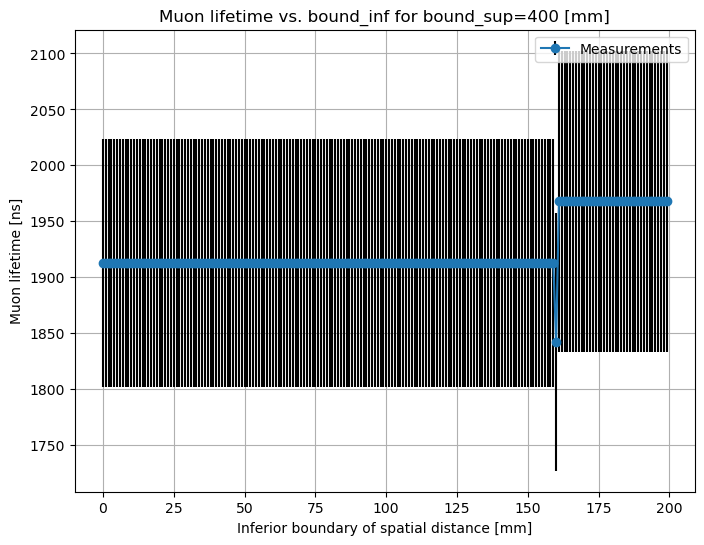

In [29]:
## Analyse of tau in function of the inferior boundary of the spatial distance
#######################################################################

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit

# import time intervales
if len(files) == 0:
    files = fnmatch.filter(os.listdir(data_directory), 'time_interval*')
time_intervals = np.array([])
for file in files:
    ti = np.loadtxt(data_directory+file)
    time_intervals = np.append(time_intervals,ti)
time_intervals*=clockcycle_value


# import distances
type_of_file = "distances_run"
# if len(files) == 0:
#     files = fnmatch.filter(os.listdir(data_directory), 'distances*')
distances = np.array([])
file = data_directory+type_of_file+number_of_run
di = np.loadtxt(file)
distances = np.append(distances,di)

## set fix superior boundary
bound_sup = 400  #mm   

## Analyse of the dependecy of tau to the inferior boundary of spatial distance

# Arrays to store data
bound_inf_values = []
tau_values = []
tau_std_values = []

#3 Loop over bound_inf
for bound_inf in range(0, 200,1):

    # Sort time_interval wrt corresponding values in distances superior to bound_inf
    condition = (distances >= bound_inf/100) & (distances <= bound_sup/100)
    sorted_time_intervals = []
  
    # Check if there are any True values in the condition
    if np.any(condition):
        indices_to_keep = np.where(condition)[0]
        for i in indices_to_keep :
            sorted_time_intervals = np.append(sorted_time_intervals,time_intervals[i])

    lim_sup = 1500
    sorted_time_intervals = [value for value in sorted_time_intervals if value < lim_sup*clockcycle_value]
    lim_inf = 50
    sorted_time_intervals = [value for value in sorted_time_intervals if value > lim_inf*clockcycle_value]
                
    #Creat histogram (not ploting it)
    n,bins,_ = ax.hist(sorted_time_intervals, 100, density=True)
    bins_centers = (bins[1:]+bins[:-1])/2

    coeffs, cov = curve_fit(exponential,bins_centers,n,p0=[0.0005,2000])
    tau = coeffs[1]
    tau_std = np.sqrt(cov[1,1])

    tau_values=np.append(tau_values,tau)
    tau_std_values=np.append(tau_std_values,tau_std)
    bound_inf_values=np.append(bound_inf_values,bound_inf)


# Plot tau vs. bound_inf
plt.figure(figsize=(8, 6))
plt.errorbar(bound_inf_values, tau_values, yerr=tau_std_values, fmt='o-', ecolor='black',label='Measurements')
plt.xlabel('Inferior boundary of spatial distance [mm]')
plt.ylabel('Muon lifetime [ns]')
plt.title('Muon lifetime vs. bound_inf for bound_sup='+str(bound_sup)+' [mm]')
plt.legend()
plt.grid(True)
plt.show()


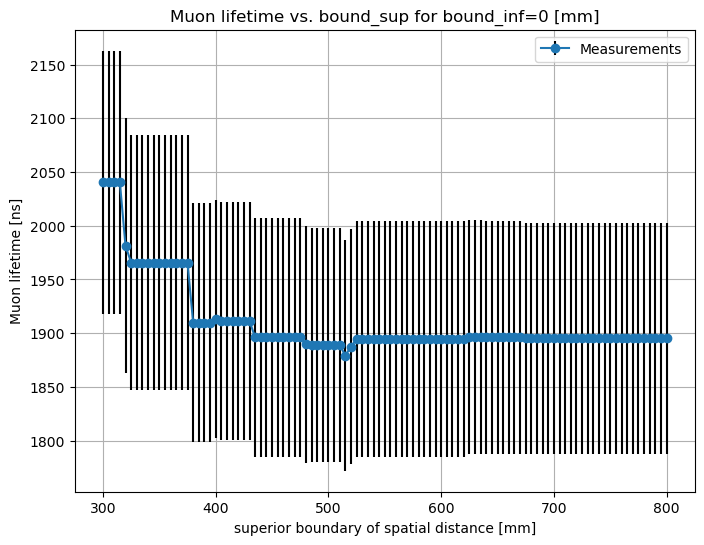

In [31]:
## Analyse of tau in function of the superior boundary of the spatial distance
#######################################################################

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit

# import time intervales
if len(files) == 0:
    files = fnmatch.filter(os.listdir(data_directory), 'time_interval*')
time_intervals = np.array([])
for file in files:
    ti = np.loadtxt(data_directory+file)
    time_intervals = np.append(time_intervals,ti)
time_intervals*=clockcycle_value


# import distances
type_of_file = "distances_run"
# if len(files) == 0:
#     files = fnmatch.filter(os.listdir(data_directory), 'distances*')
distances = np.array([])
file = data_directory+type_of_file+number_of_run
di = np.loadtxt(file)
distances = np.append(distances,di)

## set fix inferior boundary
bound_inf = 0  #mm   

## Analyse of the dependecy of tau to the superior boundary of spatial distance

# Arrays to store data
bound_sup_values = []
tau_values = []
tau_std_values = []

#3 Loop over bound_sup
for bound_sup in range(300, 801,5):

    # Sort time_interval wrt corresponding values in distances superior to bound_sup
    condition = (distances >= bound_inf/100) & (distances <= bound_sup/100)
    sorted_time_intervals = []
  
    # Check if there are any True values in the condition
    if np.any(condition):
        indices_to_keep = np.where(condition)[0]
        for i in indices_to_keep :
            sorted_time_intervals = np.append(sorted_time_intervals,time_intervals[i])

    lim_sup = 1500
    sorted_time_intervals = [value for value in sorted_time_intervals if value < lim_sup*clockcycle_value]
    lim_inf = 50
    sorted_time_intervals = [value for value in sorted_time_intervals if value > lim_inf*clockcycle_value]
                
    #Creat histogram (not ploting it)
    n,bins,_ = ax.hist(sorted_time_intervals, 100, density=True)
    bins_centers = (bins[1:]+bins[:-1])/2

    coeffs, cov = curve_fit(exponential,bins_centers,n,p0=[0.0005,2000])
    tau = coeffs[1]
    tau_std = np.sqrt(cov[1,1])

    tau_values=np.append(tau_values,tau)
    tau_std_values=np.append(tau_std_values,tau_std)
    bound_sup_values=np.append(bound_sup_values,bound_sup)


# Plot tau vs. bound_sup
plt.figure(figsize=(8, 6))
plt.errorbar(bound_sup_values, tau_values, yerr=tau_std_values, fmt='o-', ecolor='black',label='Measurements')
plt.xlabel('superior boundary of spatial distance [mm]')
plt.ylabel('Muon lifetime [ns]')
plt.title('Muon lifetime vs. bound_sup for bound_inf='+str(bound_inf)+' [mm]')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
def chisquare_manual(observed_values,expected_values):

    test_statistic=0

    for observed, expected in zip(observed_values, expected_values):

        test_statistic+=(float(observed)-float(expected))**2/float(expected)

    return test_statistic


In [ ]:
## zfit package not compatible with 3.12 python

import zfit
import mplhep
from uncertainties import unumpy, ufloat
from scipy.stats import chisquare
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import zfit
from zfit import z as ztf
import matplotlib.patches as mpatches
import math
isDebug = False
def plotFit(
    pdf,
    data,
    plotList,
    x_label,
    y_label=None,
    nbins=50,
    plot_pull=True,
    logy=False,
    rangeX=None,
    rangeY=None,
    plot_chi2 = False,
    **kwargs):

    _range = rangeX if rangeX else pdf.space.limit1d

    ## data --> histogram
    datay, bin_edges = np.histogram(data, bins=nbins, range=_range)
    errory = np.sqrt(datay)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    binwidth = (_range[1] - _range[0]) / nbins

    ## the pdf normalization
    try:
        integral_pdf = pdf.ext_integrate(_range)
    # except NotExtendedPDFError:
    except AttributeError:
        integral_pdf = pdf.integrate(_range)
    if isDebug: 
        print(f"Integral of extended pdf: N = {integral_pdf}")
        print(f"Integral of  pdf: I = {pdf.integrate(_range)}")
        print("Normalization range", pdf.norm_range)


    if pdf.is_extended:
        N = zfit.run(integral_pdf)
        integral_pdf = integral_pdf / pdf.get_yield()
        if isDebug: print(f"Calculated from extended pdf: N = {N}")
    else:
        N = np.sum(datay)
        if isDebug: print(f"Calculated from datay array: N = {N}")

    norm = N * binwidth
    if isDebug: 
        print(f"Range = {_range}")
        print(f"Norm = {norm}")



    if not rangeY:
        if logy:
            if isDebug: 
                print(min(datay), max(datay))
            rangeY = (min(datay)*0.1 + 1, max(datay) * 10.0)
        else:
            rangeY = (0.01, max(datay) * 1.2)
            # pass

    yscale = "log" if logy else ""

    x = np.linspace(*_range, num=1000)

    # LHCbStyle()

    if plot_pull:
        if kwargs.get("ax1", None) is not None:
            ax1 = kwargs["ax1"]
            f = None
        else:
            f = plt.figure()
            gs = gridspec.GridSpec(2, 1, height_ratios=[5, 1], hspace=0.125)
            ax1 = plt.subplot(gs[0])
    else:
        ax1 = kwargs.get("ax1", None)
        if ax1 is None:
            ax1 = plt.gca()
        f = None

    # plot data
    if not "data" in plotList.keys():
        plotList["data"] = {"color": "black", "label": "Data"}
    datacolor = plotList["data"].get("color", "black")
    datalabel = plotList["data"].get("label", "Data")
    mplhep.histplot(
        datay,
        bins=bin_edges,
        label=datalabel,
        ax=ax1,
        histtype="errorbar",
        color=datacolor,
        markersize=4,
        yerr=True,
        elinewidth=1.5,
    )


    # plot model
    if not "fullmodel" in plotList.keys():
        plotList["fullmodel"] = {"color": "blue", "label": "Full model"}
    fmodelcolor = plotList["fullmodel"].get("color", "blue")
    fmodellabel = plotList["fullmodel"].get("label", "Full model")

    try:
        toplot = []
        toresiduals = []
        for i, (m, frac) in enumerate(zip(pdf.get_models(), pdf.fracs)):
            if m.is_extended:
                _frac = (frac / integral_pdf) * (m.ext_integrate(_range) / m.get_yield())
            else:
                _frac = (frac / integral_pdf) * m.integrate(_range)
            y = zfit.run(m.pdf(x, norm_range=_range) * _frac * norm)
            yb = zfit.run(m.pdf(bin_centers, norm_range=_range) * _frac * norm)
            toplot.append(y)
            toresiduals.append(yb)

        _ = ax1.plot(
            x, np.sum(toplot, axis=0), color=fmodelcolor, lw=2, label=fmodellabel
        )

        prop_cycle = plt.rcParams["axes.prop_cycle"]
        colors = prop_cycle.by_key()["color"]

        for i, (m, y) in enumerate(zip(pdf.get_models(), toplot)):
            if not f"model_{i}" in plotList.keys():
                plotList[f"model_{i}"] = {"color": colors[i], "label": f"model_{i}"}
            _color = plotList[f"model_{i}"].get("color", colors[i])
            _label = plotList[f"model_{i}"].get("label", f"model_{i}")
            _ = ax1.plot(x, y, ls="--", color=_color, label=_label)

        pdfy = np.sum(toresiduals, axis=0)

    except AttributeError:
        pdfy = zfit.run(pdf.pdf(bin_centers, norm_range=_range)) * norm
        _ = ax1.plot(
            x,
            zfit.run(pdf.pdf(x, norm_range=_range)) * norm,
            color=fmodelcolor,
            lw=2,
            label=fmodellabel,
        )

    if y_label is None:
        y_label = f"Candidates/({binwidth:.2f} [ns])"

    ax1.axes.set_ylabel(y_label, ha="right", y=1)
    ax1.axes.set_xlim(_range)
    ax1.axes.set_ylim(rangeY)
    if not plot_pull:
        ax1.axes.set_xlabel(x_label, ha="right", x=1)
    else:
        ax1.set_xticklabels([])

    ax1.minorticks_on()
    ax1.legend(loc="best", fontsize=kwargs.get("fontsize", 16))

    if plot_chi2:
        nfree_params = kwargs.get("nfree_params", len(pdf.get_params(floating = True)))
        # chi2 = chisquare(datay_norm, pdfy_norm, nfree_params)[0]
        chi2 = chisquare_manual(datay, pdfy)
        ndof = nbins - 1 + nfree_params
        chi2ndof = chi2 / ndof
        
#         ax1.text(
#             0.8,
#             0.4,
#             r"$\chi^{2}$/ndof = " + f"{chi2ndof:.2f}" + f"\n nFree_params = {nfree_params}",
#             transform=ax1.transAxes,
#         )

        # where some data has already been plotted to ax
        handles, labels = ax1.get_legend_handles_labels()

        # manually define a new patch 
        patch = mpatches.Patch(label=r"$\chi^{2}$/ndof = " + f"{chi2ndof:.2f}" + f"\n nFree_params = {nfree_params}",color='k')
        # handles is a list, so append manual patch
        handles.append(patch) 
        # plot the legend
        ax1.legend(handles=handles, loc='best')

    ax1.legend(loc="best", fontsize=kwargs.get("fontsize", 16))
    if plot_pull:

        if kwargs.get("ax2", None) is not None:
            ax2 = kwargs["ax2"]
        else:
            ax2 = plt.subplot(gs[1])

        ax2.axes.set_ylim((-5, 5))
        ax2.axes.set_xlim(_range)
        ax2.axes.set_ylabel("Pulls")
        ax2.axes.set_xlabel(x_label, ha="right", x=1)
        ax2.plot(list(_range), [2, 2], color="red", linewidth=1.5, linestyle="-.")
        ax2.plot(list(_range), [-2, -2], color="red", linewidth=1.5, linestyle="-.")
        ax2.plot(list(_range), [0, 0], color="grey", linewidth=1.5, linestyle="-.")

        ax2.minorticks_on()
        datay = unumpy.uarray(datay, errory)
        errory = np.where(datay == 0.0, np.ones(errory.shape), errory)
        pully = (datay - pdfy) / errory
        ax2.errorbar(
            bin_centers,
            unumpy.nominal_values(pully),
            yerr=unumpy.std_devs(pully),
            fmt=".",
            ecolor="Black",
            markersize=4,
            color="Black",
            elinewidth=1.5,
        )
    else:
        ax2 = None

    try:
        f.align_ylabels()
    except (UnboundLocalError, AttributeError):
        pass

    if logy:
        # ax1.set_yscale("log", nonposy="clip")
        ax1.set_yscale("log")

    return f, ax1, ax2

In [ ]:
fit_window = (0,max(time_intervals))
obs = zfit.Space('t', limits=fit_window)
n = len(time_intervals)

ll = np.random.uniform(0,1e3)
n_events = zfit.Parameter(f"n_events_{ll}", n, 0., 2*n, step_size=1)

# create the model
tau_inv    = zfit.Parameter(f"tau_{ll}"   , -1/2000, -1/1000, -1/3000, step_size=0.001)
# print(tau_inv)
exp_decay = zfit.pdf.Exponential(lambda_ = tau_inv, obs=obs,)
exp_decay_ext = exp_decay.create_extended(n_events)

# load the data
data = zfit.data.Data.from_numpy(obs=obs, array=time_intervals)

# minimize
minimizer = zfit.minimize.Minuit(gradient=False, mode = 0)
nll = zfit.loss.ExtendedUnbinnedNLL(exp_decay_ext, data)
result = minimizer.minimize(nll)
# result.hesse(method='minuit_hesse', name='hesse')

# plotsList = {
#     "data":{
#         "label": "Data",
#         "color": "black"
#     },

#     "fullmodel": {
#         # "label": f"Expo, alpha = {result.params[slope_expo_1]['value']:.1f}", 
#         "label": f"Expo, \u03C4 = { -1/result.params[tau_inv]['value'] :.0f}\u00B1{abs(result.params[tau_inv]['hesse']['error']/result.params[tau_inv]['value']**2) :.0f} ns", 
#         "color":"blue"
#     },

#     "chi2": {
#         "label": f"$\chi^2$ = ", 
#         "color":"blue"
#     },
# }

# f,_,_ = plotFit(exp_decay_ext, time_intervals, plotsList, x_label="$\Delta t$ [ns]", nbins=50, linewidth=0.1, rangeX = fit_window, plot_chi2 = True, logy = True)
# plt.legend(loc = 'best', fontsize = 'x-large')

In [ ]:
f.savefig("fig_muon_decay_problem.eps")